Define a function so thath it generates ABC with probablity .3,.2and .5

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import cv2

In [2]:
def generate_random():
    r = np.random.random()
    if r<.3:
        return 'A'
    elif r >.3 and r <.5:
        return 'B'
    else :
        return 'C'

In [9]:
m1 = np.array([0., 15.])
m2 = np.array([3., .5])
m3 = np.array([9., 9])
cov = np.array([[5.0,0.0],
                [0.0, 3.0]])
d1 = np.random.multivariate_normal(m1, cov, 250)
d2 = np.random.multivariate_normal(m2, cov, 100)
d3 = np.random.multivariate_normal(m3, cov, 250)

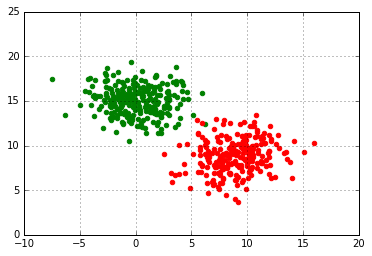

In [10]:
plt.figure(0)
plt.grid("on")
plt.scatter(d1[:, 0], d1[:, 1], color='green')
#plt.scatter(d2[:, 0], d2[:, 1])
plt.scatter(d3[:, 0], d3[:, 1], color='red')
plt.show()

In [8]:
data_X = np.concatenate((d1, d3), axis = 0)
print data_X.shape

(500, 2)


In [9]:
data_y = np.zeros((500,1))
data_y[250:0] = 1
data = np.concatenate((data_X, data_y), axis=1)
#einstein summation

In [10]:
#K-NN
def distance(v1, v2):
    return np.sqrt(((v1-v2)**2).sum())

def knn(train, test, k=3):
    dist = []
    
    for i in range(train.shape[0]):
        #get the labels
        ix = train[i, :2]
        iy = train[i, -1]
        #compute the distance from test points
        d = distance(test, ix)
        dist.append([d, iy])
        #sort based on distance and gget top k
        dk = sorted(dist, key = lambda x: x[0])[:k]
        #retrive only the labels 
        labels = np.array(dk)[:, -1]
        
        #Get frequencies of each label
        output = np.unique(labels, return_counts=True)
        index = np.argmax(output[1])
        return output[0][index]

In [11]:
from sklearn.datasets import load_digits

In [12]:
x = np.array([5.0, 11.0])
print knn(data, x, k=5)

0.0


In [35]:
data = load_digits(return_X_y=True)
X = data[0]
y = data[1]
print X.shape
print y.shape

(1797, 64)
(1797,)


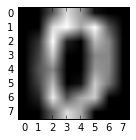

In [36]:
plt.figure(0, figsize=(2, 2))
plt.imshow(X[0].reshape((8, 8)), cmap='gray')
plt.show()

In [39]:
ds = np.concatenate((X, y.reshape(-1, 1)), axis=1)
print ds.shape

(1797, 65)


study about humming function, Norm =|| ||, 
Problem Statement: 